# Predicting Singapore Resale Housing Prices with Machine Learning and Economic Indicators

## Data Preprocessing

### HDB Resale Price Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

# Load HDB resale dataset
hp = pd.read_csv('/Users/supisara/Desktop/CSCT Datasets/combined_hp_2000_2023.csv')

# Clean categorical + fix spacing/capitalization
hp['flat_type'] = hp['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})
hp['flat_type'] = hp['flat_type'].str.strip().str.upper()
hp['flat_model'] = hp['flat_model'].str.strip().str.upper()
hp['storey_range'] = hp['storey_range'].replace({'1 TO 5': '1 TO 3'})
hp['storey_range'] = hp['storey_range'].str.strip().str.upper()
hp['town'] = hp['town'].str.strip().str.title()
hp['closest_mrt'] = hp['closest_mrt'].str.strip().str.title()

# Convert month to datetime and extract year
hp['month'] = pd.to_datetime(hp['month'], errors='coerce')
hp['year'] = hp['month'].dt.year

# Clean missing values
hp = hp.dropna(subset=['floor_area_sqm', 'resale_price', 'month'])
hp['closest_mrt_dist'] = hp['closest_mrt_dist'].fillna(hp['closest_mrt_dist'].median())
hp['cbd_dist'] = hp['cbd_dist'].fillna(hp['cbd_dist'].median())
hp['latitude'] = hp['latitude'].fillna(method='ffill')
hp['longitude'] = hp['longitude'].fillna(method='ffill')

# Drop unused columns
hp = hp.drop(columns=['address', 'block', 'street_name', 'postal_code', 'remaining_lease', 'years_remaining'], errors='ignore')

# Encode storey range into storey median
def encode_storey_range(storey_range_str):
    try:
        parts = storey_range_str.split(' TO ')
        if len(parts) == 2:
            return (int(parts[0]) + int(parts[1])) / 2
    except:
        return np.nan

hp['storey_median'] = hp['storey_range'].apply(encode_storey_range)

# Calculate price per sqm
hp['price_per_sqm'] = hp['resale_price'] / hp['floor_area_sqm']
# Calculate remaining lease based on Singapore's 99 years leasehold system
hp['remaining_lease'] = 99 - ((hp['month'].dt.year) - hp['lease_commence_date'])

/var/folders/fx/27js0hwx7xjcb4mhfn8vj0lr0000gn/T/ipykernel_3386/3908452974.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  hp = pd.read_csv('/Users/supisara/Desktop/CSCT Datasets/combined_hp_2000_2023.csv')
/var/folders/fx/27js0hwx7xjcb4mhfn8vj0lr0000gn/T/ipykernel_3386/3908452974.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hp['latitude'] = hp['latitude'].fillna(method='ffill')
/var/folders/fx/27js0hwx7xjcb4mhfn8vj0lr0000gn/T/ipykernel_3386/3908452974.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hp['longitude'] = hp['longitude'].fillna(method='ffill')


In [3]:
hp

,latitude,longitude,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,storey_median,price_per_sqm,remaining_lease
0,1.370650,103.839410,Mayflower Mrt Station,328.873025,9781.806181,2000-01-01,Ang Mo Kio,4 ROOM,10 TO 12,106.0,MODEL A,1993,296000.0,2000,11.0,2792.452830,92
1,1.371017,103.839305,Mayflower Mrt Station,308.580046,9823.548103,2000-01-01,Ang Mo Kio,4 ROOM,07 TO 09,89.0,NEW GENERATION,1978,225000.0,2000,8.0,2528.089888,77
2,1.371827,103.838804,Mayflower Mrt Station,252.058259,9920.003203,2000-01-01,Ang Mo Kio,EXECUTIVE,04 TO 06,147.0,APARTMENT,1996,530000.0,2000,5.0,3605.442177,95
3,1.371827,103.838804,Mayflower Mrt Station,252.058259,9920.003203,2000-01-01,Ang Mo Kio,EXECUTIVE,07 TO 09,144.0,APARTMENT,1996,563000.0,2000,8.0,3909.722222,95
4,1.371827,103.838804,Mayflower Mrt Station,252.058259,9920.003203,2000-01-01,Ang Mo Kio,EXECUTIVE,01 TO 03,139.0,APARTMENT,1996,527000.0,2000,2.0,3791.366906,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609445,1.417389,103.832369,Khatib Mrt Station,68.040054,15008.676091,2023-04-01,Yishun,3 ROOM,07 TO 09,67.0,MODEL A,2018,450000.0,2023,8.0,6716.417910,94
609446,1.415191,103.832902,Khatib Mrt Station,242.585206,14759.708167,2023-04-01,Yishun,EXECUTIVE,10 TO 12,142.0,APARTMENT,1988,865000.0,2023,11.0,6091.549296,64
609447,1.415715,103.833410,Khatib Mrt Station,190.560783,14809.421378,2023-04-01,Yishun,3 ROOM,04 TO 06,73.0,MODEL A,1988,412000.0,2023,5.0,5643.835616,64
609448,1.413545,103.836971,Khatib Mrt Station,614.307170,14522.828800,2023-04-01,Yishun,5 ROOM,01 TO 03,127.0,IMPROVED,1988,640000.0,2023,2.0,5039.370079,64


### Macroeconomic Data Preprocessing

In [5]:
# Load macroeconomic dataset (all anually)
econ = pd.read_excel('/Users/supisara/Desktop/CSCT Datasets/combined_SG_economic copy 5.xlsx')

# Sort year 
econ['Year'] = econ['Year'].astype(int)
econ = econ.sort_values('Year')

# Replicate yearly data into monthly rows
monthly_econ = econ.loc[econ.index.repeat(12)].copy()
monthly_econ['month'] = pd.date_range(start='2000-01-01', periods=len(monthly_econ), freq='MS')

first_row = monthly_econ.iloc[0].copy()
first_row['month'] = pd.to_datetime('2000-01-01')
monthly_econ = pd.concat([pd.DataFrame([first_row]), monthly_econ], ignore_index=True)
monthly_econ = monthly_econ.sort_values('month').reset_index(drop=True)

# Drop 'Year' column
monthly_econ = monthly_econ.drop(columns='Year')
print(monthly_econ.head())

            GDP  GDP per Capita  GNI per Capita  Inflation Rate  \
0  9.607654e+10           41121           40870        1.361624   
1  9.607654e+10           41121           40870        1.361624   
2  9.607654e+10           41121           40870        1.361624   
3  9.607654e+10           41121           40870        1.361624   
4  9.607654e+10           41121           40870        1.361624   

   Resident Household  HDB Dwellings  Unemployment Rate  Population  \
0              915100         805000                3.7     4027887   
1              915100         805000                3.7     4027887   
2              915100         805000                3.7     4027887   
3              915100         805000                3.7     4027887   
4              915100         805000                3.7     4027887   

   Interest Rate      month  
0       1.896582 2000-01-01  
1       1.896582 2000-01-01  
2       1.896582 2000-02-01  
3       1.896582 2000-03-01  
4       1.896582 200

In [129]:
# Load yield interest rate dataset (monthly format)
yield_interest_rate = pd.read_excel('/Users/supisara/Desktop/CSCT Datasets/5-Year Bond Yield_interest copy 2.xlsx')
yield_interest_rate["month"] = pd.to_datetime(
    yield_interest_rate["month"].str[:4] + yield_interest_rate["month"].str[4:],
    format="%Y%b"
)

print(yield_interest_rate.head())

       month  Yield_5y_interest
0 2023-12-01               2.68
1 2023-11-01               2.92
2 2023-10-01               3.28
3 2023-09-01               3.34
4 2023-08-01               3.11


In [131]:
# Merge all economic indicators together
econ_full = pd.merge(monthly_econ, yield_interest_rate, on='month', how='left')

In [11]:
# Merge resale house price dataset with merged economic dataset
hp_full = pd.merge(hp, econ_full, on='month', how='left')

### Full Resale House Price Dataset with Economic Indicators

In [13]:
hp_full

,latitude,longitude,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,storey_range,floor_area_sqm,...,GDP,GDP per Capita,GNI per Capita,Inflation Rate,Resident Household,HDB Dwellings,Unemployment Rate,Population,Interest Rate,Yield_5y_interest
0,1.370650,103.839410,Mayflower Mrt Station,328.873025,9781.806181,2000-01-01,Ang Mo Kio,4 ROOM,10 TO 12,106.0,...,9.607654e+10,41121,40870,1.361624,915100,805000,3.700,4027887,1.896582,3.96
1,1.370650,103.839410,Mayflower Mrt Station,328.873025,9781.806181,2000-01-01,Ang Mo Kio,4 ROOM,10 TO 12,106.0,...,9.607654e+10,41121,40870,1.361624,915100,805000,3.700,4027887,1.896582,3.96
2,1.371017,103.839305,Mayflower Mrt Station,308.580046,9823.548103,2000-01-01,Ang Mo Kio,4 ROOM,07 TO 09,89.0,...,9.607654e+10,41121,40870,1.361624,915100,805000,3.700,4027887,1.896582,3.96
3,1.371017,103.839305,Mayflower Mrt Station,308.580046,9823.548103,2000-01-01,Ang Mo Kio,4 ROOM,07 TO 09,89.0,...,9.607654e+10,41121,40870,1.361624,915100,805000,3.700,4027887,1.896582,3.96
4,1.371827,103.838804,Mayflower Mrt Station,252.058259,9920.003203,2000-01-01,Ang Mo Kio,EXECUTIVE,04 TO 06,147.0,...,9.607654e+10,41121,40870,1.361624,915100,805000,3.700,4027887,1.896582,3.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611831,1.417389,103.832369,Khatib Mrt Station,68.040054,15008.676091,2023-04-01,Yishun,3 ROOM,07 TO 09,67.0,...,5.014275e+11,114690,93592,4.821467,1425100,1108100,3.444,5917648,3.000000,2.82
611832,1.415191,103.832902,Khatib Mrt Station,242.585206,14759.708167,2023-04-01,Yishun,EXECUTIVE,10 TO 12,142.0,...,5.014275e+11,114690,93592,4.821467,1425100,1108100,3.444,5917648,3.000000,2.82
611833,1.415715,103.833410,Khatib Mrt Station,190.560783,14809.421378,2023-04-01,Yishun,3 ROOM,04 TO 06,73.0,...,5.014275e+11,114690,93592,4.821467,1425100,1108100,3.444,5917648,3.000000,2.82
611834,1.413545,103.836971,Khatib Mrt Station,614.307170,14522.828800,2023-04-01,Yishun,5 ROOM,01 TO 03,127.0,...,5.014275e+11,114690,93592,4.821467,1425100,1108100,3.444,5917648,3.000000,2.82


## Exploratory Data Analysis (EDA)

#### Resale Price Distribution

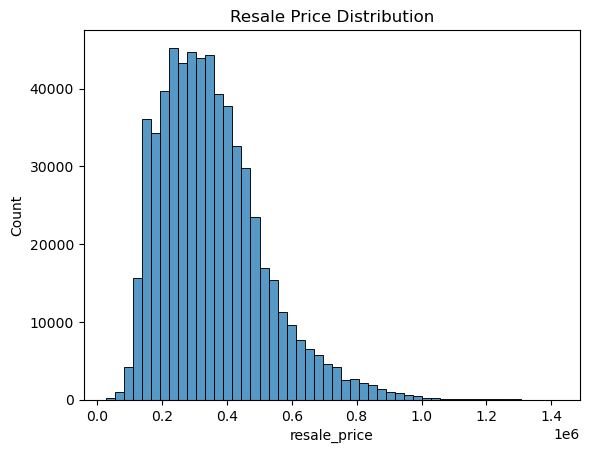

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(hp_full['resale_price'], bins=50)
plt.title('Resale Price Distribution')
plt.show()

#### Resale Price by Flat Type

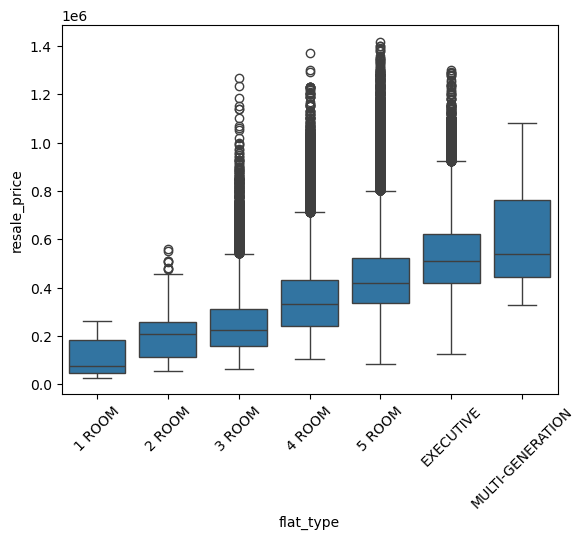

In [134]:
flat_order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
sns.boxplot(x='flat_type', y='resale_price', data=hp_full, order=flat_order)
plt.xticks(rotation=45)
plt.show()

#### Resale Price by Storey Range

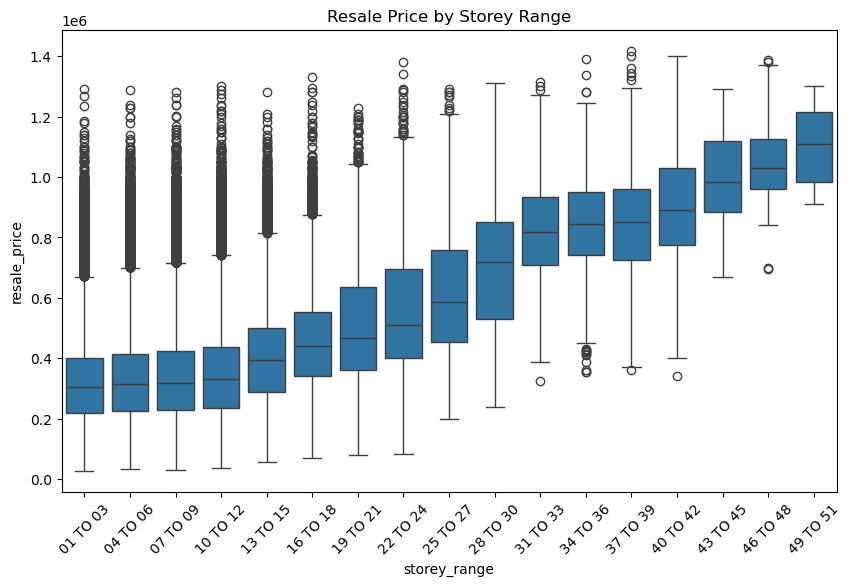

In [136]:
storey_order = ['01 TO 03', '04 TO 06', '07 TO 09', '10 TO 12',
                '13 TO 15', '16 TO 18', '19 TO 21', '22 TO 24',
                '25 TO 27', '28 TO 30', '31 TO 33', '34 TO 36',
                '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48',
                '49 TO 51']
plt.figure(figsize=(10, 6))
sns.boxplot(x='storey_range', y='resale_price', data=hp_full, order=storey_order)
plt.xticks(rotation=45)
plt.title('Resale Price by Storey Range')
plt.show()

#### Resale Price vs. Floor Area, Gropued by Flat Type

/var/folders/fx/27js0hwx7xjcb4mhfn8vj0lr0000gn/T/ipykernel_3386/1312128400.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


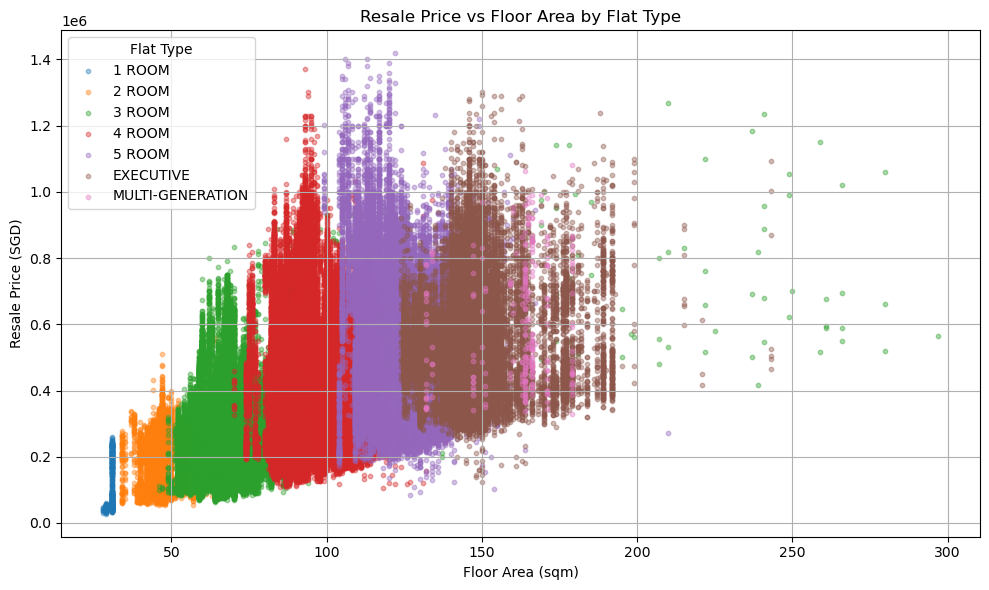

In [21]:
plt.figure(figsize=(10, 6))

# Loop through each flat type
for ft in flat_order:
    subset = hp_full[hp_full['flat_type'] == ft]
    plt.scatter(
        x=subset['floor_area_sqm'],
        y=subset['resale_price'],
        label=ft,
        alpha=0.4,
        s=10
    )

plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price (SGD)')
plt.title('Resale Price vs Floor Area by Flat Type')
plt.legend(title='Flat Type')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Average Resale Price Over Time by Flat Type

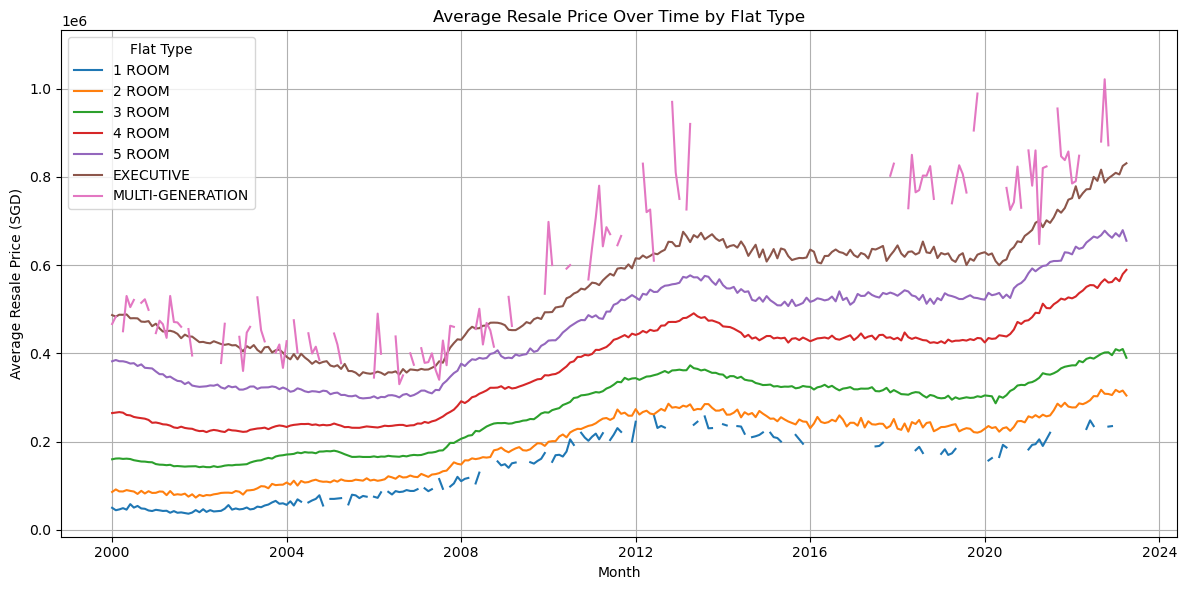

In [23]:
hp_full['month'] = pd.to_datetime(hp_full['month'])
monthly_avg = hp_full.groupby([hp_full['month'], hp_full['flat_type']])['resale_price'].mean().reset_index()
pivot_df = monthly_avg.pivot(index='month', columns='flat_type', values='resale_price')

# Plot each line with matching color
plt.figure(figsize=(12, 6))
for ft in flat_order:
    if ft in pivot_df:
        plt.plot(pivot_df.index, pivot_df[ft], label=ft)
        
plt.title('Average Resale Price Over Time by Flat Type')
plt.xlabel('Month')
plt.ylabel('Average Resale Price (SGD)')
plt.legend(title='Flat Type')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Correlation of all Numeric Features with resale_price

In [25]:
hp_full.corr(numeric_only=True)['resale_price'].sort_values(ascending=False)

resale_price           1.000000
price_per_sqm          0.796414
GDP                    0.649225
Population             0.634857
GNI per Capita         0.633268
year                   0.628123
GDP per Capita         0.617918
HDB Dwellings          0.616455
Resident Household     0.612828
floor_area_sqm         0.540513
lease_commence_date    0.461685
storey_median          0.290311
Inflation Rate         0.234844
longitude              0.105110
remaining_lease        0.065381
closest_mrt_dist       0.021532
latitude              -0.058688
cbd_dist              -0.098016
Interest Rate         -0.172420
Unemployment Rate     -0.352215
Yield_5y_interest     -0.392426
Name: resale_price, dtype: float64

## Model Training

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

# Set random seed
np.random.seed(42)

# Define features and target variable
features = [
    'floor_area_sqm', 'storey_median',
    'closest_mrt', 'cbd_dist', 'lease_commence_date', 'town',
    'flat_model', 'flat_type',
    'GDP', 'GDP per Capita', 'GNI per Capita', 'Population',
    'Resident Household', 'HDB Dwellings', 'Inflation Rate',
    'Interest Rate', 'Unemployment Rate', 'Yield_5y_interest'
]
target = 'resale_price'

# Encode categorical variables 
categorical_cols = ['town', 'flat_model', 'flat_type', 'closest_mrt']

# Create a copy to avoid modifying the original DataFrame
hp_encoded = hp_full.copy()

# Apply ordinal encoding to categorical columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
hp_encoded[categorical_cols] = encoder.fit_transform(hp_encoded[categorical_cols])

# Save encoder for web deployment
joblib.dump(encoder, 'ordinal_encoder.pkl')

# Train-test split - Time-based
hp_encoded = hp_encoded.sort_values('month').reset_index(drop=True)
n_train = int(len(hp_encoded) * 0.8)

X_train = hp_encoded.loc[:n_train - 1, features]
y_train = hp_encoded.loc[:n_train - 1, target]
X_test = hp_encoded.loc[n_train:, features]
y_test = hp_encoded.loc[n_train:, target]

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Define the RF model
rf_model = RandomForestRegressor(
    n_estimators=100,    # Number of trees
    max_depth=12,        # Maximum depth of each tree
    random_state=42,     # For reproducibility
    n_jobs=-1            # Use all available CPU cores
)
# Train the RF model using the training dataset
rf_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_rf = rf_model.predict(X_test)

# Evaluation RF model performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the evaluation results
print(f"[Random Forest] Test RMSE: {rmse_rf:.2f}")
print(f"[Random Forest] Test R2: {r2_rf:.4f}")
print(f"[Random Forest] Test MAE: {mae_rf:.2f}")

[Random Forest] Test RMSE: 85233.96
[Random Forest] Test R2: 0.7433
[Random Forest] Test MAE: 65916.12


### HistGradientBoostingRegressor

In [33]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Define the HGB model 
hgb_model = HistGradientBoostingRegressor(
    max_iter=100,         # Number of boosting iterations (trees)
    learning_rate=0.1,    # Step size shrinkage used in each boosting step
    max_depth=8,          # Maximum depth of each tree
    random_state=42       # For reproducibility
)
# Train the HGB model using the training dataset
hgb_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_hgb = hgb_model.predict(X_test)

# Evaluation HGB model performance
rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
r2_hgb = r2_score(y_test, y_pred_hgb)
mae_hgb = mean_absolute_error(y_test, y_pred_hgb)

# Print the evaluation results
print(f"[HistGradientBoosting] Test RMSE: {rmse_hgb:.2f}")
print(f"[HistGradientBoosting] Test R2: {r2_hgb:.4f}")
print(f"[HistGradientBoosting] Test MAE: {mae_hgb:.2f}")

# Save model
# joblib.dump(model, 'hdb_price_model.pkl')

[HistGradientBoosting] Test RMSE: 81833.54
[HistGradientBoosting] Test R2: 0.7634
[HistGradientBoosting] Test MAE: 63736.31


### XGBoost

In [37]:
from xgboost import XGBRegressor

# Define the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,    # Number of trees
    learning_rate=0.1,   # Step size shrinkage used in each boosting step
    max_depth=8,         # Maximum depth of each tree
    random_state=42,     # For reproducibility
    n_jobs=-1            # Use all available CPU cores
)

# Train the XGBoost model using the training dataset
xgb_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation XGBoost model performance
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print the evaluation results
print(f"[XGBoost] Test RMSE: {rmse_xgb:.2f}")
print(f"[XGBoost] Test R2: {r2_xgb:.4f}")
print(f"[XGBoost] Test MAE: {mae_xgb:.2f}")


[XGBoost] Test RMSE: 77606.68
[XGBoost] Test R2: 0.7872
[XGBoost] Test MAE: 60628.30


### Comparing Results

In [80]:
results = pd.DataFrame({
    "Model": ["Random Forest", "HistGradientBoosting", "XGBoost"],
    "RMSE": [rmse_rf, rmse_hgb, rmse_xgb],
    "MAE": [mae_rf, mae_hgb, mae_xgb],
    "R²": [r2_rf, r2_hgb, r2_xgb]
})

print(results.sort_values("RMSE"))

                  Model          RMSE           MAE        R²
2               XGBoost  77606.676483  60628.302911  0.787220
1  HistGradientBoosting  81833.541064  63736.313019  0.763411
0         Random Forest  85233.956279  65916.119163  0.743340


#### Save the best performer for web deployment

In [86]:
joblib.dump(xgb_model, 'xgb_hdb_price_model.pkl')

['xgb_hdb_price_model.pkl']

## Time Series Cross-Validation for Model Evaluation

#### Cross-validation for XGBoost

In [180]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

# RMSE scores (negated, so multiply by -1)
xgb_neg_rmse_scores = cross_val_score(
    xgb_model,
    X_train,
    y_train,
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    n_jobs=-1
)

xgb_rmse_scores = -xgb_neg_rmse_scores  # Make positive
print(f"[XGBoost] Mean CV RMSE: {xgb_rmse_scores.mean():.2f}")
print(f"[XGBoost] Std CV RMSE: {xgb_rmse_scores.std():.2f}")

[XGBoost] Mean CV RMSE: 55824.13
[XGBoost] Std CV RMSE: 27421.33


#### Cross-validation for HistGradientBoosting

In [182]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

# RMSE scores (negated, so multiply by -1)
hgb_neg_rmse_scores = cross_val_score(
    hgb_model,
    X_train,
    y_train,
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    n_jobs=-1
)

hgb_rmse_scores = -hgb_neg_rmse_scores  # Make positive
print(f"[HistGradientBoosting] Mean CV RMSE: {hgb_rmse_scores.mean():.2f}")
print(f"[HistGradientBoosting] Std CV RMSE: {hgb_rmse_scores.std():.2f}")

[HistGradientBoosting] Mean CV RMSE: 57546.13
[HistGradientBoosting] Std CV RMSE: 27939.38


#### Cross-validation for Random Forest

In [184]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

# RMSE scores (negated, so multiply by -1)
rf_neg_rmse_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    n_jobs=-1
)

rf_rmse_scores = -rf_neg_rmse_scores  # Make positive
print(f"[Random Forest] Mean CV RMSE: {rf_rmse_scores.mean():.2f}")
print(f"[Random Forest] Std CV RMSE: {rf_rmse_scores.std():.2f}")

[Random Forest] Mean CV RMSE: 59716.70
[Random Forest] Std CV RMSE: 28782.83


### Comparing Cross-validation Results

In [194]:
cv_results = pd.DataFrame({
    "Model": ["CV XGBoost", "CV HistGradientBoosting", "CV Random Forest"],
    "Mean CV RMSE": [xgb_rmse_scores.mean(), hgb_rmse_scores.mean(), rf_rmse_scores.mean()],
    "Std CV RMSE": [xgb_rmse_scores.std(), hgb_rmse_scores.std(), rf_rmse_scores.std()],
})

print(cv_results.sort_values("Mean CV RMSE"))

                     Model  Mean CV RMSE   Std CV RMSE
0               CV XGBoost  55824.131350  27421.326073
1  CV HistGradientBoosting  57546.128380  27939.384325
2         CV Random Forest  59716.702637  28782.828837


## XGBoost Performance Visualisations 

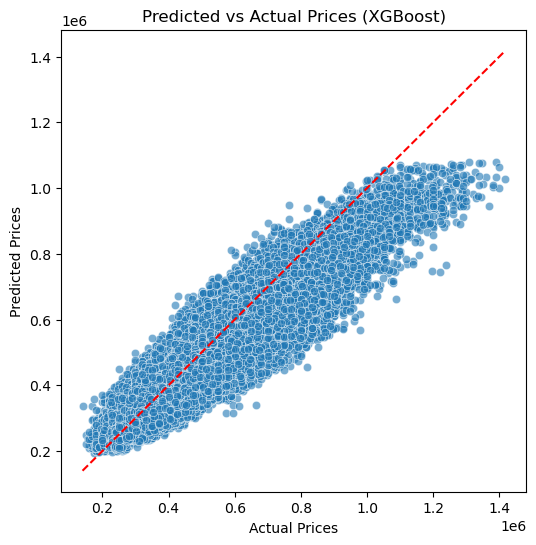

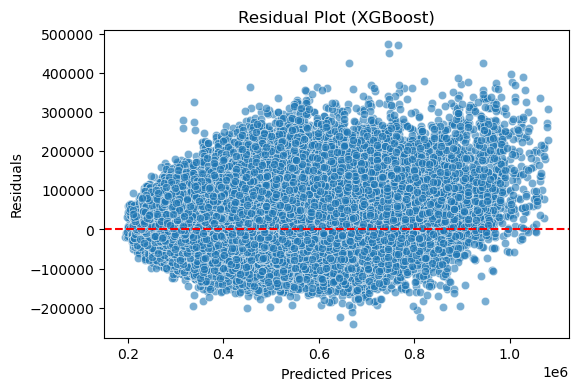

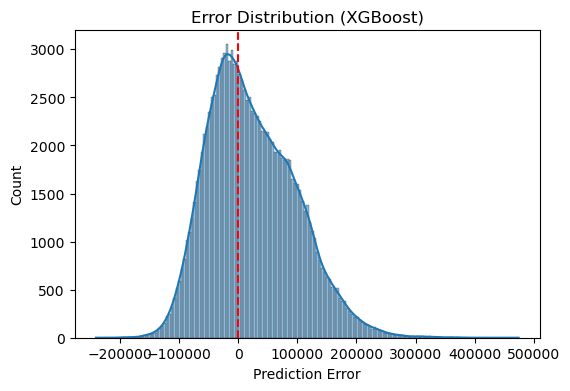

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predicted vs Actual
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices (XGBoost)')
plt.show()

# Residual Plot
residuals = y_test - y_pred_xgb
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_xgb, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot (XGBoost)')
plt.show()

# Error Distribution
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Prediction Error')
plt.title('Error Distribution (XGBoost)')
plt.show()


## SHAP Analysis

In [201]:
import shap
import matplotlib.pyplot as plt

# Use SHAP TreeExplainer for trained XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Prepare the full test set
X_shap = X_test.copy() 

# Compute SHAP values for the selected test set
shap_values = explainer.shap_values(X_shap)

/var/folders/fx/27js0hwx7xjcb4mhfn8vj0lr0000gn/T/ipykernel_3386/2583420773.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_shap, plot_type="dot")


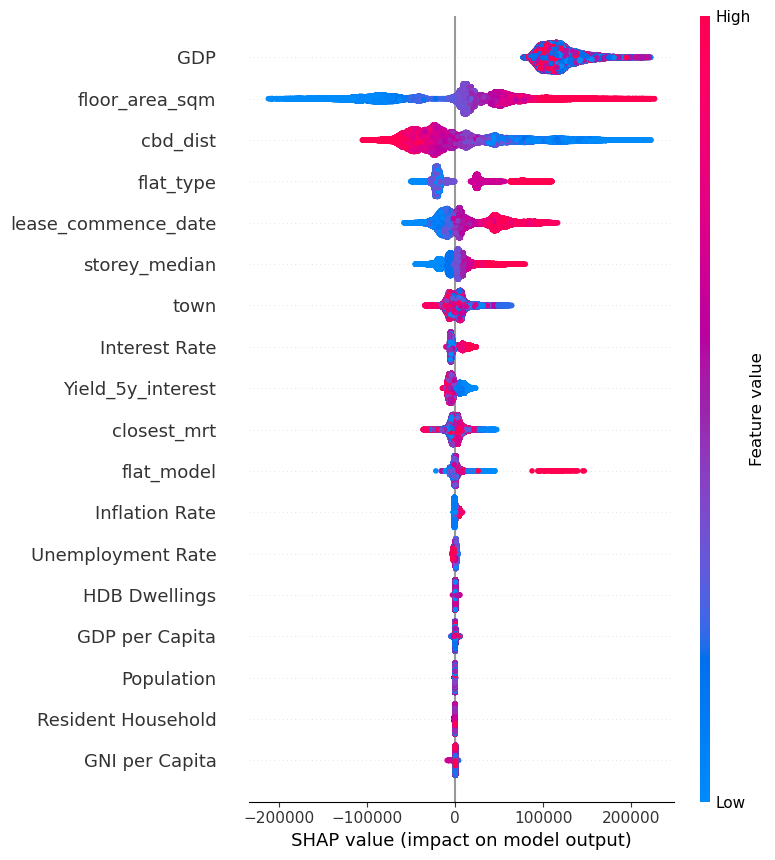

In [115]:
# Summary beeswarm plot to show all features
shap.summary_plot(shap_values, X_shap, plot_type="dot")

/var/folders/fx/27js0hwx7xjcb4mhfn8vj0lr0000gn/T/ipykernel_3386/3949716303.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_shap, plot_type="bar")


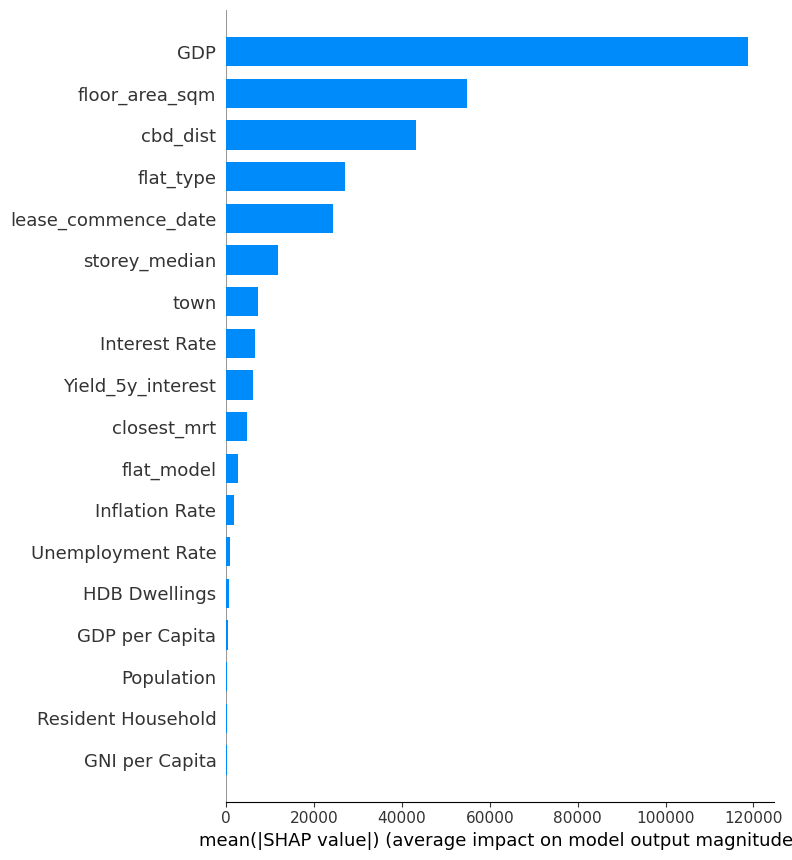

In [119]:
# Summary bar plot to show global feature importance
shap.summary_plot(shap_values, X_shap, plot_type="bar")

In [150]:
# Get numeric SHAP values (mean absolute) for each feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance = pd.DataFrame({
    'feature': X_shap.columns,
    'mean_abs_shap': mean_abs_shap
}).sort_values(by='mean_abs_shap', ascending=False)

print(shap_importance)

                feature  mean_abs_shap
8                   GDP  118742.234375
0        floor_area_sqm   54925.164062
3              cbd_dist   43178.835938
7             flat_type   27018.976562
4   lease_commence_date   24355.626953
1         storey_median   11861.930664
5                  town    7355.595215
15        Interest Rate    6586.687988
17    Yield_5y_interest    6023.971680
2           closest_mrt    4820.892090
6            flat_model    2788.255127
14       Inflation Rate    1840.881348
16    Unemployment Rate     933.522339
13        HDB Dwellings     732.962952
9        GDP per Capita     400.157745
11           Population     287.046509
12   Resident Household     265.766205
10       GNI per Capita     164.702713


## Permutation Importance

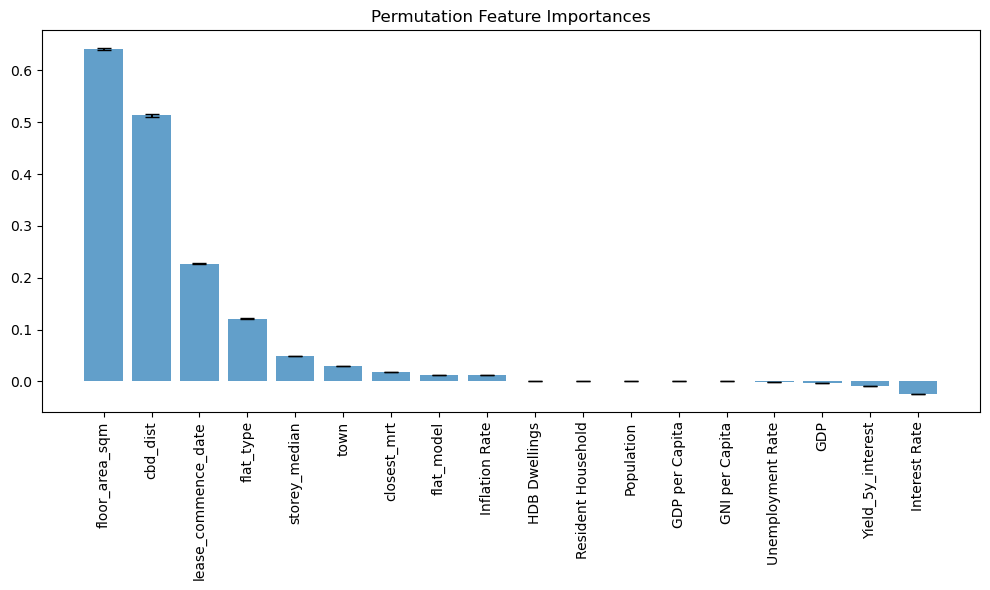

In [111]:
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation feature importance for the trained XGBoost model
result = permutation_importance(
    xgb_model, 
    X_test, y_test, 
    n_repeats=10, 
    random_state=42, 
    n_jobs=-1
)

# Extract mean importance and standard deviation across repeats
importances = result.importances_mean
std = result.importances_std

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importance with error bars
plt.figure(figsize=(10,6))
plt.title("Permutation Feature Importances")
plt.bar(range(X_test.shape[1]), importances[indices], yerr=std[indices], align="center", alpha=0.7, ecolor='black', capsize=5)
plt.xticks(range(X_test.shape[1]), [X_test.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [113]:
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': X_test.columns[indices],
    'Importance': importances[indices],
    'Std Dev': std[indices]
})

print(importance_df)

                Feature  Importance   Std Dev
0        floor_area_sqm    0.641317  0.002278
1              cbd_dist    0.513007  0.002724
2   lease_commence_date    0.227119  0.001391
3             flat_type    0.120722  0.000824
4         storey_median    0.049259  0.000347
5                  town    0.030297  0.000345
6           closest_mrt    0.017619  0.000192
7            flat_model    0.012598  0.000179
8        Inflation Rate    0.011604  0.000041
9         HDB Dwellings    0.000000  0.000000
10   Resident Household    0.000000  0.000000
11           Population    0.000000  0.000000
12       GDP per Capita    0.000000  0.000000
13       GNI per Capita   -0.000008  0.000006
14    Unemployment Rate   -0.000810  0.000014
15                  GDP   -0.002403  0.000030
16    Yield_5y_interest   -0.008648  0.000129
17        Interest Rate   -0.024657  0.000123
